# **Types of layers in Convolutional Neural Networks(CNNs)**



A Convolutional Neural Network contains 3 different layers:
1. Convolutional Layers

2. Pooling layers
 
3. Fully Connected Layers

In this notebook we will go through each of these layers in detail with code examples.


The image below shows the structure of a regular neural network and that of Convolutional Neural Networks. Observe the types of layers in each network.

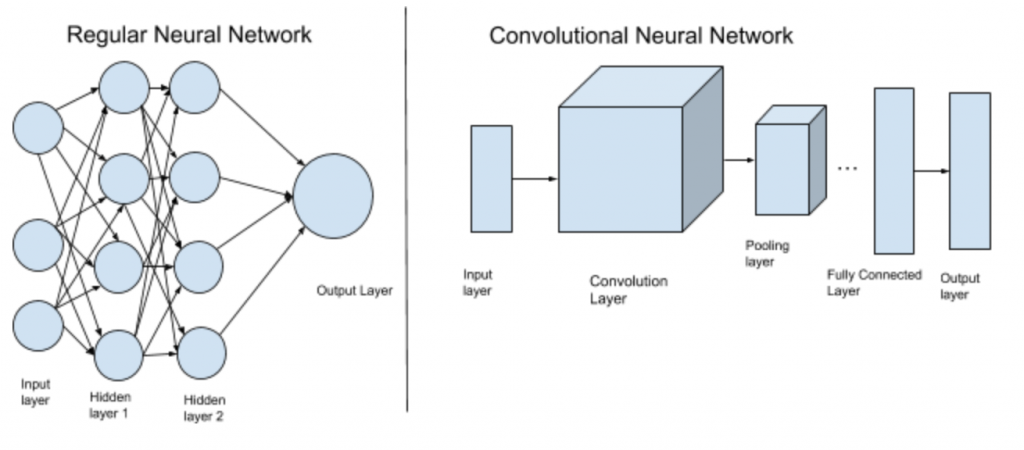

In [ ]:
#@title
from IPython.display import Image
Image("drive/MyDrive/Content/Sreeram/Images/2-1.png")

Image source: https://www.topcoder.com/convolutional-neural-networks-in-pytorch/

## CONVOLUTION LAYER

***What is Convolution?***

*Convolution is a mathematical operation on two functions (f and g), that produces a third function (f . g) which expresses how the shape of the inputs is modified by the convolution operation.*

But for the scope of this notebook, we don't have to study the complex mathematics behind convolution. We'll just look at how the convolution operation takes place. 

> *If we perform convolution between 2 matrices(images) with 2 dimensions, then we get a 2 dimensional matrix as output.*



---


***What is Convolution Operation?***

The objective of the Convolution Operation is to **extract the features such as edges, corners, curves present in the input image**. The features that are extracted are enough for training rather than the complete image to reduce the complexity. 

CNNs handle the extraction of features on their own and programmer doesn't have to explicitly extract the features, thus reducing the pre-processing time.

The basic process involves modification of a source matrix by *convolving* with a convolution matrix- called as a **kernel**. A kernel's dimensions usually vary and is generally a square matrix with 3x3 or 5x5 dimensions. The values in the kernel matrix will decide the outcome of the convolution and are assigned as per needed for the application. 

The following image shows the output of a single convolution process. Note how -8 is the output of the convolution.

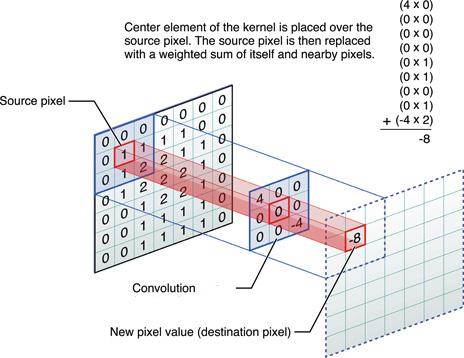

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/2-2.png")

A few Kernels can be: 


As you can see in the image below, the output will vary as the values in the kernel are varied.

`You can observe that if only the centre element is 1 and others are 0, we get the same image as the source image.`

`Meanwhile if all the elements are 1, then we get a blurred image.`

---

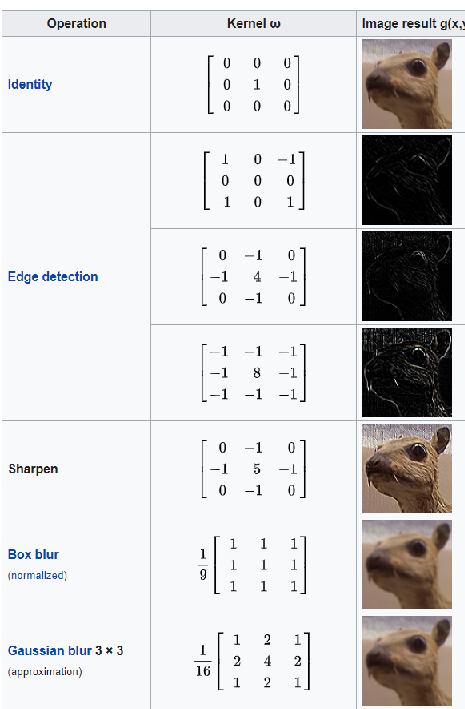

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/2-3.png")

<br><br>Consider watching a video on how the convolution works with an example.

[2D Convolution Video](https://www.youtube.com/watch?v=sTTuaNp5LTw)

[2D convolution Page](https://www.allaboutcircuits.com/technical-articles/two-dimensional-convolution-in-image-processing/)

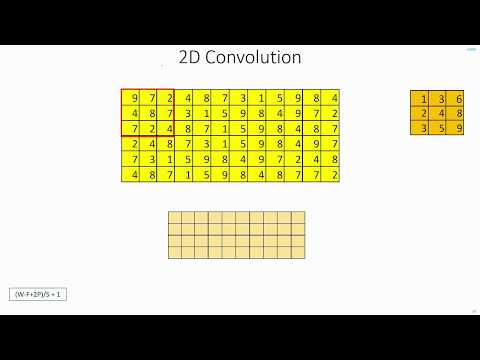

In [ ]:
#@title 2D convolution
#To watch it here, please connect to runtime(Google Colab) and Run the code
from IPython.display import YouTubeVideo

YouTubeVideo('sTTuaNp5LTw',width=800,height=400)

#### **Strides**

Stride decide how our weight matrix/Kernel should move in the input, i.e jumping one step or two


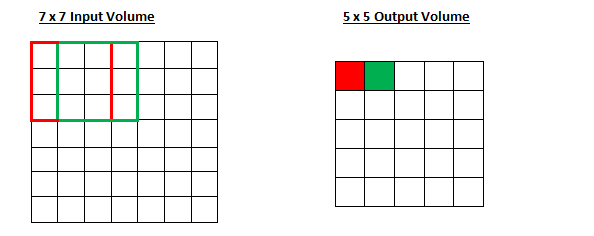

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/1-11.png")

Img src: https://deepai.org/machine-learning-glossary-and-terms/stride

As seen in the image, when a 7x7 Input image is applied with convolution having 3x3 kernel(All are discussed in the next notebook), we get a shunk image of 5x5 image.

### **Convolution Layer**

Watch the GIF below as to how the Convolution works.

![](https://miro.medium.com/max/625/1*GcI7G-JLAQiEoCON7xFbhg.gif)

The green section resembles our **5x5x1 input image, I.** The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the **Kernel/Filter, K**, represented in the color yellow. We have selected **K as a 3x3x1 matrix.**


```
Kernel/Filter, K = 
1  0  1
0  1  0
1  0  1
```



#### Convolution for Coloured Images

We know in general that the images may be in grayscale(Black and White) or coloured(RGB).

*  In grayscale, the image pixel values range from 0 to 255, 0 being black and 255 bring white.
*  In colored, we generally adapt 3 layers of matrices for each individual color format, like *Red, Green and Blue,* combining which we get a coloured image. 

To perform Convolution on these multilayered images, the kernel is also taken with the same number of layers as the input image. In this case, the Kernel also has 3 layers for each colour.






![](https://miro.medium.com/max/875/1*ciDgQEjViWLnCbmX-EeSrA.gif)

#### **Padding**

As you can see from the above example, there are a few zeroes in the edges.

When normally after performing the convolution and striding and the outputs are made into a feature map. This new mapping will be a matrix with smaller size.
To prevent the reduction in size, *Padding* is performed.

Padding will extra Zeroes on the edges of the input matrix to help the convultion process to reusult of the same size as the unpadded input.


![](https://miro.medium.com/max/419/1*GfUMWDQd4dXEcAlypxi44Q.gif)

Img src: https://medium.com/@prasadpal107/dictionary-for-cnn-753a1a39db45

Img: Convolution process in multiple layers

Watch [this](https://www.youtube.com/watch?v=KTB_OFoAQcc) Video(Optional) by [Andrew NG](https://en.wikipedia.org/wiki/Andrew_Ng) for Multiple layer Convolution.

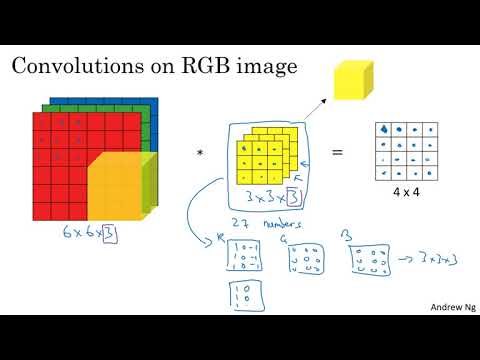

In [ ]:
#@title Convolutions Over a Volume
YouTubeVideo('KTB_OFoAQcc',width=800,height=400)



---



Let's see the code to implement for **Convolution layers.**

*Do not worry how these work as of now, as they'll be explained in the upcoming notebooks.*

In [ ]:
import numpy as np 
import keras
from keras.layers import Conv2D        #To import the Convolution layer/function.

#   To add a Convolutional Layer to the Model

model = keras.models.Sequential( 
    [Conv2D(2, kernel_size=(2, 2), strides=(2,2), padding="same")])  

# Above is a model with a single Conv2D layer with 2 filters, with kernel_size 2x2 tensor(matrix), and x and y stride of 2 each.


# define input image 4x4 pixels
image = np.array([[0, 0, 1, 1], 
                  [1, 1, 0, 0], 
                  [1, 1, 0, 0], 
                  [0, 0, 1, 1]],dtype="float32")

image = image.reshape(1, 4, 4, 1)

output = model.predict(image)

print(output)
#Expected Output will be the Convolution results. Each number is the output of convolution for that particular stride.  

[[[[ 0.89995253 -0.5101606 ]
   [ 0.54648864 -0.38513756]]

  [[ 0.54648864 -0.38513756]
   [ 0.89995253 -0.5101606 ]]]]


## II. **POOLING LAYERS**



***What is Pooling?***

The pooling operation involves sliding a two-dimensional filter over each channel of feature image and summarizing the features within the region covered by the filter.



***Why to use Pooling Layers?***

*  Pooling layers are used to reduce the dimensions of the feature maps or images- thus reducing the number of parameters to learn and the amount of computation needed in the network.
*  The pooling layer summarizes the features present in a region of the feature map which is generated by a convolution layer. So, further operations are performed on summarized features generated by the convolution layer. This makes the model more flexible to variations in the position of the features in the input image.


### **Types of Pooling Layers**

#### 1. **Max Pooling**

Max pooling is a pooling operation that selects the maximum element from the region of the feature map filter covers. Thus, the output after max-pooling layer would be a matrix containing the most prominent features of the previous feature map.


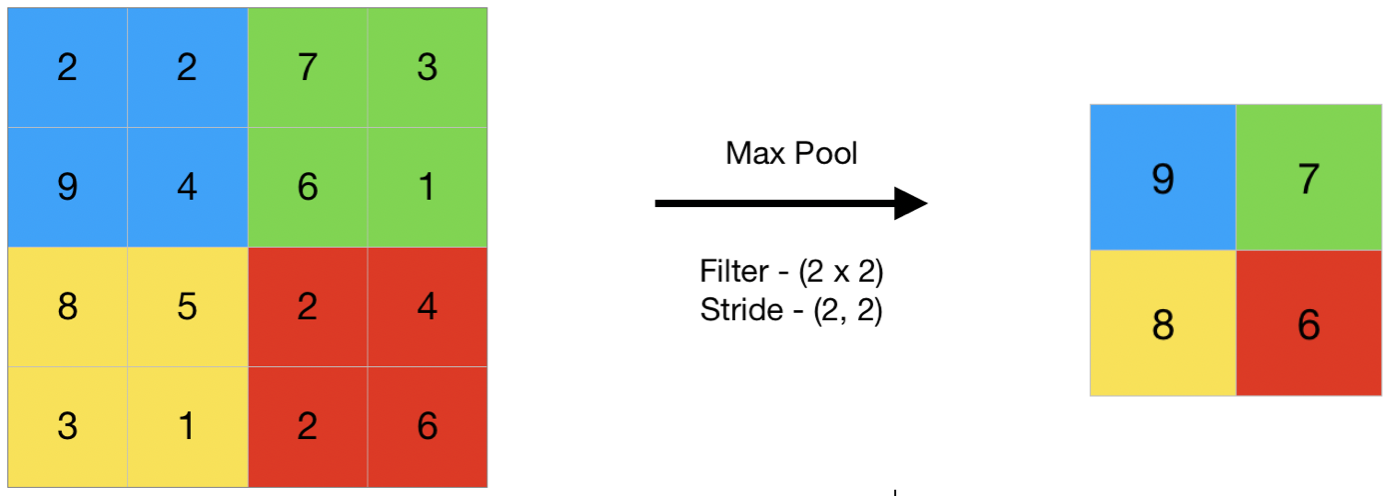

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/2-6.png")


As seen above, the filter will *stride accross the image* and will return the maximum element from the area it covers in that iteration.

##### **Code**
Let's see the code to implement for GlobalPooling layers.

*Do not worry how these work as of now, as they'll be explained in the upcoming notebooks.*

In [ ]:
import numpy as np 
import keras
from keras.layers import MaxPooling2D        #To import the Maxpooling layer/function.

#   To add a Maxpooling Layer to the Model

model = keras.models.Sequential( 
    [MaxPooling2D(pool_size = (2,2), strides = (2,2))])  

# Above is a model with a single maxpooling layer with pool size 2x2, and x and y stride of 2 each.


# define input image 4x4 pixels
image = np.array([[1, 2, 5, 8], 
                  [3, 4, 6, 7], 
                  [12, 9, 13, 15], 
                  [11, 10, 16, 14]],dtype="float32")

image = image.reshape(1, 4, 4, 1)

output = model.predict(image)

print(output)
# The expected output is
# 4  8
# 12 16

[[[[ 4.]
   [ 8.]]

  [[12.]
   [16.]]]]


#### 2.  **Average Pooling**

Average pooling calculates the average of the elements in the region of feature map the filter covers. The Max pooling gives the most prominent feature in a particular patch of the feature map while average pooling gives the average of all the features present in the patch covered.

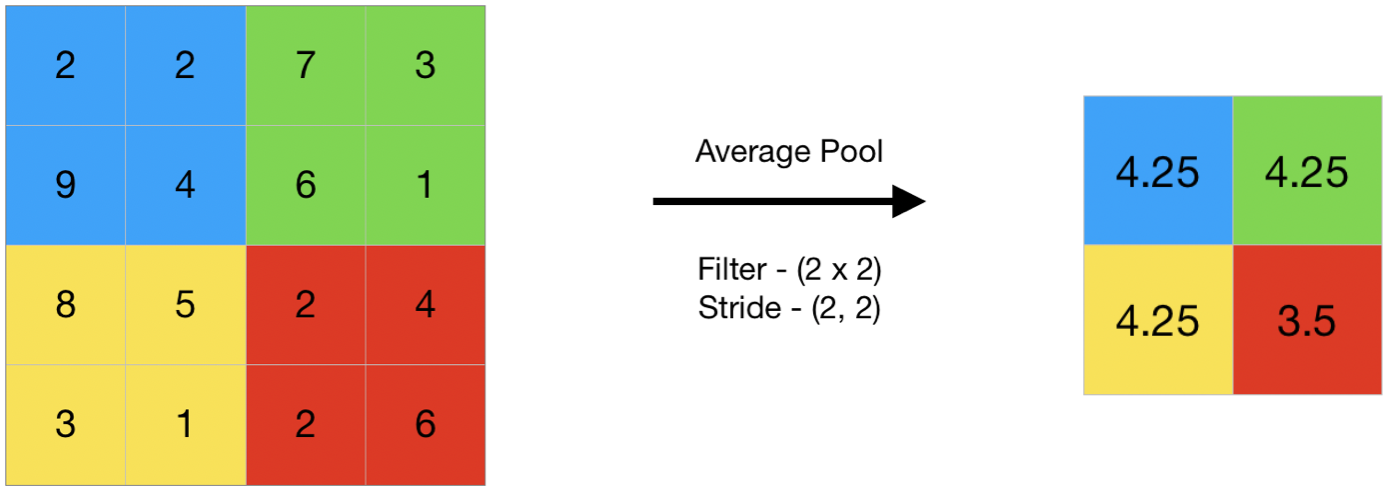

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/2-7.png")



As seen above, the filter will *stride accross the image* and will return the Average of all elements from the area it covers in that iteration.

##### **Code**
Let's see the code to implement for GlobalPooling layers.

*Do not worry how these work as of now, as they'll be explained in the upcoming notebooks.*

In [ ]:
import numpy as np 
import keras
from keras.layers import AveragePooling2D   #To import the AveragePooling layer/function.

#   To add a AveragePooling Layer to the Model

model = keras.models.Sequential( 
    [AveragePooling2D(pool_size = (2,2), strides = (2,2))])

# Above is a model with a single AveragePooling layer with pool size 2x2, and x and y stride of 2 each.


# define input image 4x4 pixels
image = np.array([[1, 2, 5, 8], 
                  [3, 4, 6, 7], 
                  [12, 9, 13, 15], 
                  [11, 10, 16, 14]], dtype="float32")

image = image.reshape(1, 4, 4, 1)

output = model.predict(image)

print(output)
# The expected output is
# 2.5  6.5
# 10.5 14.5

[[[[ 2.5]
   [ 6.5]]

  [[10.5]
   [14.5]]]]


#### 3. **Global Pooling**

Global pooling reduces each channel in the feature map to a single value. This is equivalent to using a filter of dimensions **nh x nw** for a layer with dimensions **nh x nw x nc**.
Global Pooling can be either global max pooling or global average pooling.

```
-> nh - height of feature map
-> nw - width of feature map
-> nc - number of channels in the feature map
```

##### **Code**
Let's see the code to implement for GlobalPooling layers.

*Do not worry how these work as of now, as they'll be explained in the upcoming notebooks.*

In [ ]:
import numpy as np 
import keras
from keras.layers import GlobalMaxPooling2D        #To import the GlobalMaxPooling2D layer/function.
from keras.layers import GlobalAveragePooling2D    #To import the GlobalAveragePooling2D layer/function.

#   To add a Convolutional Layer to the Model

# defne gm_model containing just a single global-max pooling layer 
gm_model = keras.models.Sequential( 
    [GlobalMaxPooling2D()]) 
  
# define ga_model containing just a single global-average pooling layer 
ga_model = keras.models.Sequential( 
    [GlobalAveragePooling2D()])

# Above is a model with a single Conv2D layer with 2 filters, with kernel_size 2x2 tensor(matrix), and x and y stride of 2 each.


# define input image 4x4 pixels
image = np.array([[1, 2, 5, 8], 
                  [3, 4, 6, 7], 
                  [12, 9, 13, 15], 
                  [11, 10, 16, 14]], dtype="float32")

image = image.reshape(1, 4, 4, 1)

output1 = gm_model.predict(image)
output2 = ga_model.predict(image)

print(output1)
print(output2)
# The expected output is
# 16     // As it is the Max of all the elements
# 8.5    // As it is the Mean of all the elements

[[16.]]
[[8.5]]


## III. **FULLY CONNECTED LAYERS**

> **Fully Connected Layer is nothing but *feed forward neural networks**.

*  Fully Connected Layers form the last few layers in the CNN network for proper classification according to the application as needed.

*  The input to the fully connected layer is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.



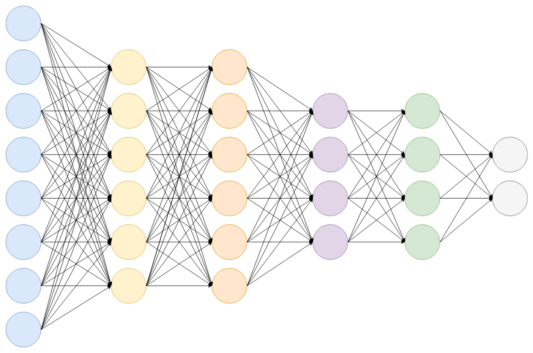

In [ ]:
#@title
Image("drive/MyDrive/Content/Sreeram/Images/2-8.png")


* The Image being a 2D matrix is *Flattened* into a column vector, and thus the flattened output is fed to a feed-forward neural network since it is a 1D network and perform the same mathematical operations as in an Artificial Neural Network.

*  The final layer in the fully connected layers uses the ***softmax activation function*** (instead of ReLU) which is used to get probabilities of the input belonging to a particular class. (classification).

## References

1. [CNNs explained- Part 1 (Recommended)](https://www.youtube.com/watch?v=4KDMChgUUyU)

1. [CNNs explained- Part 2 (Recommended)](https://www.youtube.com/watch?v=aOIjhET4nps)

1. [A friendly introduction to Convolutional Neural Networks and Image Recognition](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)

1. [Convolutional Neural Networks (CNNs) Graphic Video](https://www.youtube.com/watch?v=YRhxdVk_sIs)